In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os 
import sys
sns.set_style('darkgrid')
sns.set_palette('bone')

pd.options.display.float_format = '{:.3f}'.format


In [4]:
def toTapleList(list1, list2):
    return list(itertools.product(list1, list2))

In [8]:
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns : 
        col_type = df[col].dtype
        
        if col_type  != object :
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    
            else : 
                if c_min>np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else : 
                    df[col] = df[col].astype(np.float64)
                    
    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f}MB --> {:.2f} MB (Decreased by {:.1f}%)".format(start_mem, end_mem, 100*(start_mem - end_mem) / start_mem))
    return df

In [9]:
%%time 
train = pd.read_csv('train_V2.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('test_V2.csv')
test = reduce_mem_usage(test)
print(train.shape, test.shape)

Memory usage of dataframe is 983.90MB --> 339.28 MB (Decreased by 65.5%)
Memory usage of dataframe is 413.18MB --> 140.19 MB (Decreased by 66.1%)
(4446966, 29) (1934174, 28)
Wall time: 13.9 s


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float32
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float32
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float32
roadKills          int8
swimDistance       float32
teamKills          int8
vehicleDestroys    int8
walkDistance       float32
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float32
dtypes: float32(6), int16(5), int8(14), object(4)
memory usage: 339.3+ MB


In [11]:
null_cnt = train.isnull().sum().sort_values()
print('null count : ', null_cnt[null_cnt >0])

null count :  winPlacePerc    1
dtype: int64


In [12]:
train.describe(include = np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.234,0.589,0.000,0.000,0.000,0.000,22.000
boosts,1.107,1.716,0.000,0.000,0.000,2.000,33.000
damageDealt,130.633,169.887,0.000,0.000,84.240,186.000,6616.000
DBNOs,0.658,1.146,0.000,0.000,0.000,1.000,53.000
headshotKills,0.227,0.602,0.000,0.000,0.000,0.000,64.000
heals,1.370,2.680,0.000,0.000,0.000,2.000,80.000
killPlace,47.599,27.463,1.000,24.000,47.000,71.000,101.000
killPoints,505.006,627.505,0.000,0.000,0.000,1172.000,2170.000
kills,0.925,1.558,0.000,0.000,0.000,1.000,72.000
killStreaks,0.544,0.711,0.000,0.000,0.000,1.000,20.000


In [14]:
for c in ['Id', 'groupId', 'matchId'] :
    print(f'unique[{c}] count : ', train[c].nunique())

unique[Id] count :  4446966
unique[groupId] count :  2026745
unique[matchId] count :  47965


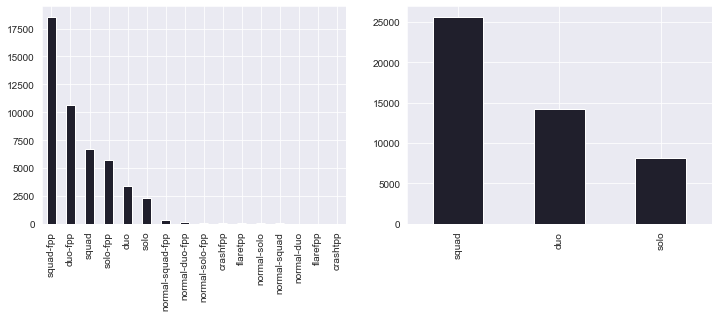

In [15]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax = ax[0])

mapper = lambda x : 'solo' if ('solo' in x ) else 'duo' if ('duo' in x ) or ('crash' in x ) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

In [16]:
for q in ['numGroups == maxPlace', 'numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))

numGroups == maxPlace : 1241090
numGroups != maxPlace : 3205876


In [17]:
cols = ['numGroups', 'maxPlace']
desc1 = train.groupby('matchType')[cols].describe()[toTapleList(cols, ['min','mean','max'])]
group = train.groupby(['matchType', 'matchId','groupId']).count().groupby(['matchType','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis = 1)

numGroups                maxPlace                groups in match  \
                min   mean     max      min   mean     max             min   
matchType                                                                    
duo           1.000 45.812  52.000    3.000 47.609  52.000           1.000   
solo          1.000 91.115 100.000    1.000 93.909 100.000           1.000   
squad         2.000 27.039  37.000    2.000 27.983  37.000           2.000   

                          
            mean     max  
matchType                 
duo       45.349  52.000  
solo      85.669 100.000  
squad     26.835  37.000

In [18]:
match = train.groupby(['matchType', 'matchId']).size().to_frame('players in match')
group = train.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[toTapleList(['players in match'], ['min','mean','max'])], group.groupby('matchType').describe()[toTapleList(['players in group'], ['min','mean','max'])]], axis = 1)

players in match                players in group             
                       min   mean     max              min  mean    max
matchType                                                              
duo                  7.000 92.986 100.000            1.000 2.050 72.000
solo                 1.000 89.032 100.000            1.000 1.039 64.000
squad                5.000 93.723 100.000            1.000 3.493 74.000

In [19]:
print(group['players in group'].nlargest(5))
del match, group

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


In [20]:
subset = train[train['matchId'] == '41a634f62f86b7']
sub_grp = subset[subset['groupId'] == '128b07271aa012']

print('matchId == \'41a634f62f86b7\' & groupId == \'128b07271aa012\'')
print('-'*50)
print('players:',len(subset))
print('groups :', subset['groupId'].nunique())
print('numGroups:', subset['numGroups'].unique())
print('maxPlace :', subset['maxPlace'].unique())
print('-'*50)
print('max-group players :', len(sub_grp))
print('max-group winPlacePerc :', sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc :', subset['winPlacePerc'].sort_values().unique())

matchId == '41a634f62f86b7' & groupId == '128b07271aa012'
--------------------------------------------------
players: 97
groups : 34
numGroups: [34]
maxPlace : [97]
--------------------------------------------------
max-group players : 64
max-group winPlacePerc : [0.28119999]
--------------------------------------------------
winPlacePerc : [0.         0.0104     0.0208     0.0312     0.0417     0.0521
 0.0625     0.0729     0.0833     0.0938     0.1042     0.1146
 0.125      0.1354     0.14579999 0.15620001 0.16670001 0.1771
 0.1875     0.1979     0.20829999 0.21879999 0.22920001 0.2396
 0.25       0.2604     0.27079999 0.28119999 0.7604     0.77079999
 0.89579999 0.91670001 0.9896     1.        ]


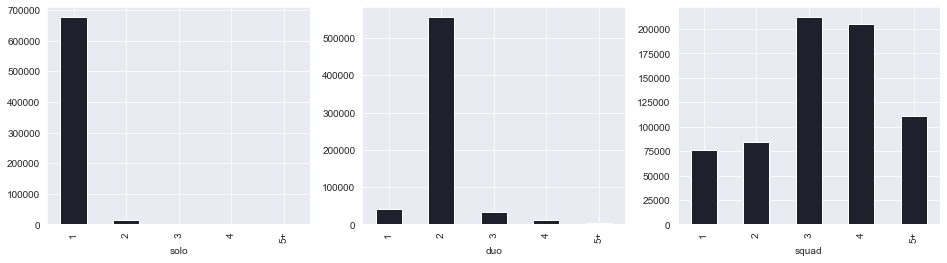

In [23]:
group = train.groupby(['matchId', 'groupId','matchType'])['Id'].count().to_frame('players').reset_index()
group.loc[group['players']>4, 'players'] = '5+'
group['players'] = group['players'].astype(str)

fig, ax = plt.subplots(1, 3, figsize = (16,4))
for mt, ax in zip(['solo', 'duo', 'squad'], ax.ravel()):
    ax.set_xlabel(mt)
    group[group['matchType'] == mt]['players'].value_counts().sort_index().plot.bar(ax=ax)

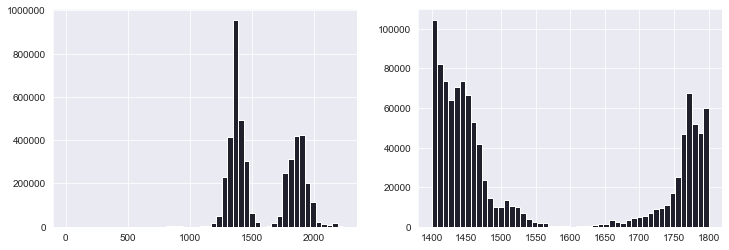

In [24]:
fig, ax = plt.subplots(1,2,figsize = (12,4))

train['matchDuration'].hist(bins=50, ax=ax[0])
train.query('matchDuration >=1400 & matchDuration <=1800')['matchDuration'].hist(bins = 50, ax=ax[1])

In [25]:
train[train['matchDuration'] == train['matchDuration'].min()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.000,0,0,0,1,...,0,0.000,0,0.000,0,0,0.000,0,0,nan


In [26]:
train[train['matchDuration'] == train['matchDuration'].max()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
130663,8089c9ef1fa09e,3c909156e89431,f8e02cb4c82d7d,0,0,0.000,0,0,0,72,...,0,0.000,0,0.000,0,0,231.800,3,0,0.260
139317,3049d51e07bab3,4086a790e99513,f8e02cb4c82d7d,0,0,100.000,0,0,0,34,...,0,0.000,0,0.000,0,0,696.000,7,0,0.458
146220,cb3902c30f688c,65400d5cf84ead,f8e02cb4c82d7d,0,0,0.000,0,0,0,85,...,0,0.000,0,0.000,0,0,99.950,1,0,0.125
246201,80e022ce3a64ff,b668e37229bb2d,f8e02cb4c82d7d,0,1,96.250,0,1,0,35,...,0,0.000,0,0.000,0,0,1395.000,6,0,0.375
268239,0e50a3a859d3ab,9dcca2c1beb072,f8e02cb4c82d7d,0,0,0.000,0,0,0,41,...,0,0.000,0,0.000,0,0,121.700,3,0,0.906


In [27]:
(train.groupby('matchId')['matchDuration'].nunique() > 1).any()

False

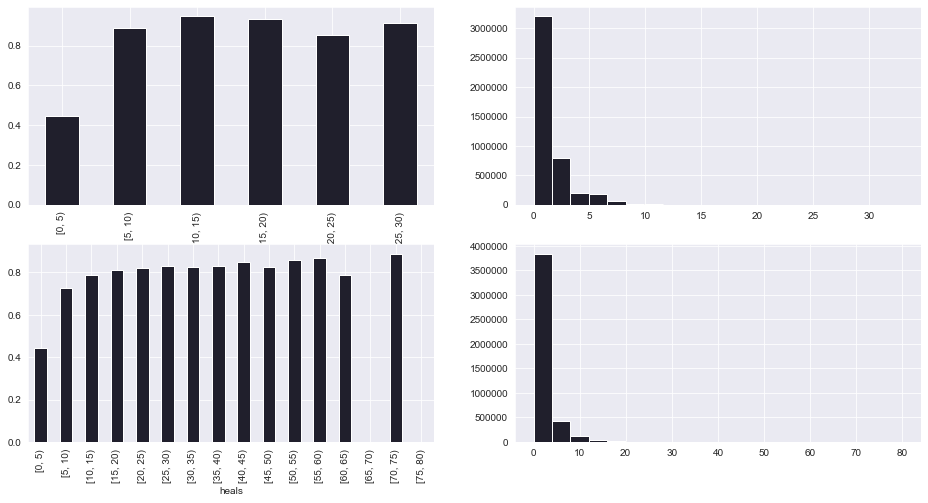

In [28]:
fig, ax = plt.subplots(2,2,figsize = (16,8))
cols = ['boosts', 'heals']
for col, ax in zip(cols, ax):
    sub = train[['winPlacePerc',col]].copy()
    mv = (sub[col].max()//5)+1
    sub[col] = pd.cut(sub[col], [5*x for x in range(0, mv)], right = False)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
    train[col].hist(bins = 20, ax= ax[1])

In [30]:
print('solo player has revives :', 'solo' in train.query('revives >0')['matchType'].unique())

solo player has revives : False


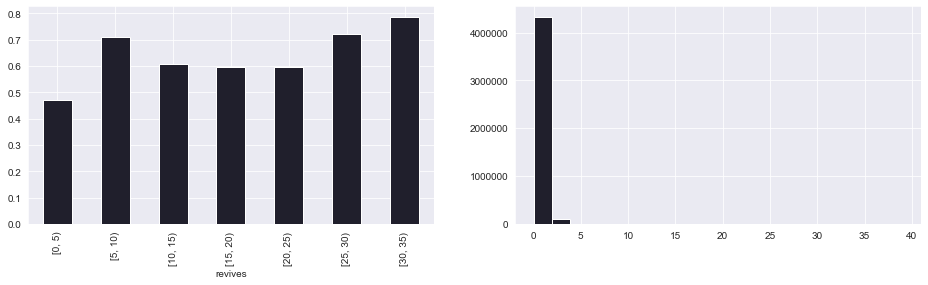

In [32]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
col = 'revives'
sub = train.loc[~train['matchType'].str.contains('solo'),['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], [5*x for x in range(0,8)], right = False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax = ax[0])
train[col].hist(bins=20, ax = ax[1])

In [33]:
train.groupby(['matchType'])['killPlace'].describe()[['min','mean','max']]

,min,mean,max
matchType,,,
duo,1.000,47.471,100.000
solo,1.000,47.457,100.000
squad,1.000,47.712,101.000


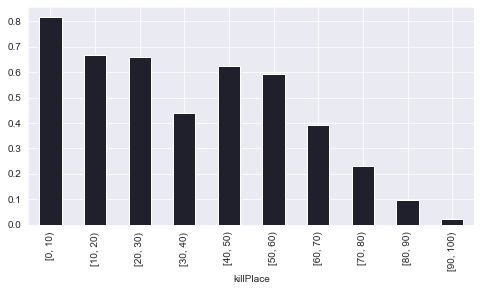

In [35]:
plt.figure(figsize = (8,4))
col = 'killPlace'
sub = train[['winPlacePerc', col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()

In [36]:
subMatch = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc', 'killPlace'])
cols = ['groupId', 'kills', 'winPlacePerc', 'killPlace']
subMatch[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.000,94
3599150,3a6addfa0df938,0,0.000,95
4367296,236ab9e9c081b9,0,0.037,88
4131025,236ab9e9c081b9,0,0.037,89
3088817,236ab9e9c081b9,0,0.037,90
...,...,...,...,...
1303528,ca058240046b4c,6,0.963,3
3637258,ca058240046b4c,5,0.963,6
2351120,ca058240046b4c,1,0.963,24
2848198,4d1bbbc19b9084,5,1.000,5


In [ ]:
#kills 부터